In [16]:
import numpy as np
from scipy.stats import expon, bernoulli
from scipy.linalg import expm
import matplotlib.pyplot as plt
import pandas as pd

Q = 
$\begin{pmatrix}
-\lambda & \lambda & 0 & 0 & \dots & 0 & 0 & 0\\
\mu & -\mu-\lambda & \lambda & 0 & \dots & 0 & 0 & 0\\
0 & 2\mu & -2\mu-\lambda & \lambda & \dots & 0 & 0 & 0\\
\dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots\\
0 & 0 & 0 & 0 & \dots & k\mu & -k\mu-\lambda & \lambda \\
0 & 0 & 0 & 0 & \dots & 0 & k\mu & -k\mu \\
\end{pmatrix}$

$\pi Q = 0$

$\pi_i = \frac{\lambda^i}{\mu^i k!} \pi_0, i \leq k$

$\pi_{k+i}= \frac{\lambda^{k+i}}{\mu^{k+i} k! k^i} \pi_0, 1\geq i \leq r$


In [17]:
def Q(lamb, mu, k ,r):
    if k + r < 1:
        assert ValueError
    
    Q = [[-lamb, lamb] + [0 for i in range(r+k-1)]]
    
    for j in range(r+k-1):
        if j < k:
            Q.append([0 for i in range(j)] + [(j+1)*mu, -lamb-(j+1)*mu, lamb] + [0 for i in range(r+k-2-j)])
        else:
            Q.append([0 for i in range(j)] + [k*mu, -lamb-k*mu, lamb] + [0 for i in range(r+k-2-j)])
    Q.append([0 for i in range(r+k-1)] + [k*mu, -k*mu])
    
    return np.array(Q)

def pi(lamb, mu, k ,r):
    pi0 = 0
    temp = 0
    for i in range(r+k+1):
        if i <= k:
            temp += (lamb/mu)**i / np.math.factorial(i)
        else:
            temp += (lamb/mu)**i / np.math.factorial(k) / k**(i-k)
    pi0 = 1/temp
    res = []
    for i in range(r+k+1):
        if i <= k:
            res.append([(lamb/mu)**i / np.math.factorial(i) * pi0])
        else:
            res.append([(lamb/mu)**i / np.math.factorial(k) / k**(i-k) * pi0])
    return np.array(res)

def gen_chain(T, lambda_, mu, k, r, start_amt = 0):
    Q_ = Q(lambda_, mu, k, r)
    cur_t = 0
    cur_pos = start_amt
    time = [0]
    trajectory = [start_amt]
    while 1:
        cur_t += expon.rvs(scale = 1 / -Q_[cur_pos][cur_pos])
        if cur_t > T:
            break
            
        if cur_pos == 0:
            cur_pos += 1
        elif cur_pos == k + r:
            cur_pos -= 1
        else:
            cur_pos += 2 * bernoulli.rvs(p = Q_[cur_pos][cur_pos + 1] / -Q_[cur_pos][cur_pos]) - 1
        time.append(cur_t)
        trajectory.append(cur_pos)
        
    return np.array(time), np.array(trajectory)
            

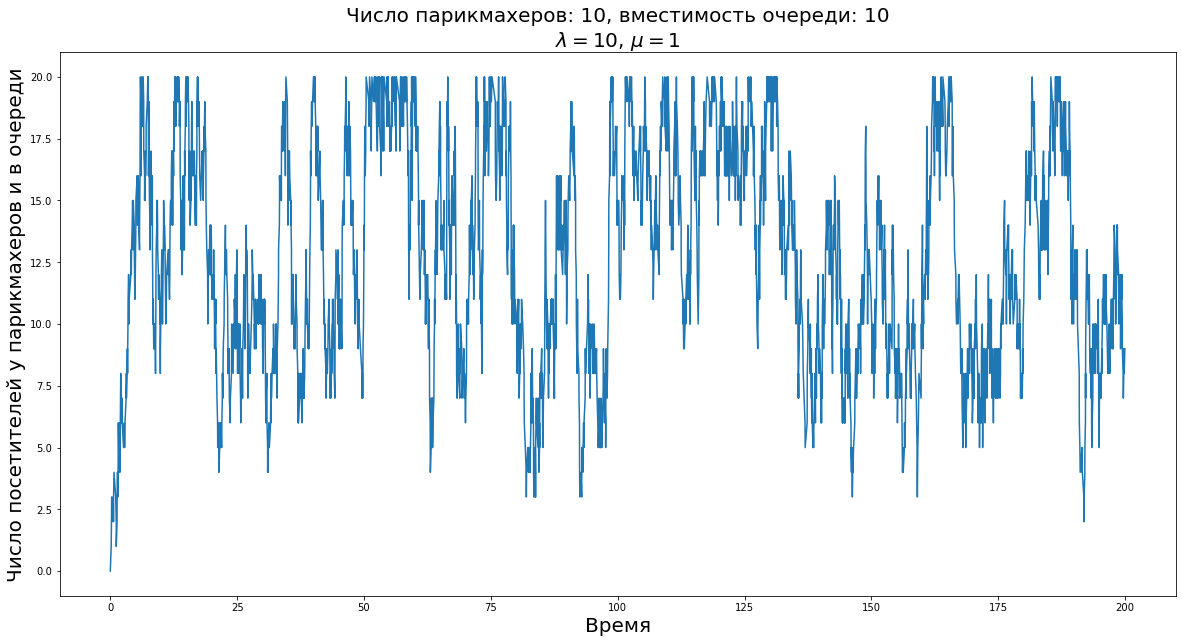

In [5]:
T = 200
lamb = 10
mu = 1
barbers_amt = 10
queue_size = 10

t, amt = gen_chain(T, lamb, mu, barbers_amt, queue_size, 0)
plt.figure(figsize=(20, 10))
plt.plot(t, amt)
plt.title(f'Число парикмахеров: {barbers_amt}, вместимость очереди: {queue_size}\n$\lambda = ${lamb}, $\mu = ${mu}', size = 20)
plt.xlabel("Время", size = 20)
plt.ylabel("Число посетителей у парикмахеров и в очереди", size = 20)
None

## Задача 8.2

In [6]:
T = 1000
lamb = 10
mu = 1
barbers_amt = 10
queue_size = 10

t, amt = gen_chain(T, lamb, mu, barbers_amt, queue_size)  
pd.DataFrame(np.hstack((t.reshape((-1, 1)), amt.reshape((-1, 1)))), columns = ["time", "amt"]) 
for i in range(len(t) - 1, 0, -1):
        t[i] = t[i] - t[i-1]

In [8]:
df = pd.DataFrame(np.hstack((t.reshape((-1, 1)), amt.reshape((-1, 1)))), columns = ["time", "amt"])
df2 = df.groupby("amt").mean()
df2["time"] = df2["time"] / df2["time"].sum()
df2

,time
amt,
0.0,0.055145
1.0,0.071337
2.0,0.062458
3.0,0.060773
4.0,0.057219
5.0,0.048279
6.0,0.049377
7.0,0.047187
8.0,0.043943


In [9]:
pd.DataFrame(pi(lamb, mu, barbers_amt, queue_size), columns = ['стац распр'])

,стац распр
0,0.000025
1,0.000248
2,0.001238
3,0.004125
4,0.010314
5,0.020627
6,0.034379
7,0.049113
8,0.061391
9,0.068212


In [10]:
repets = 500
T = 30
lamb = 1
mu = 1
barbers_amt = 2
queue_size = 2

distrs = []

for i in range(barbers_amt + queue_size + 1):
    distrs.append([gen_chain(T, lamb, mu, barbers_amt, queue_size, i)[1][-1] for j in range(repets)])
pd.DataFrame([np.bincount(distr, minlength = barbers_amt + queue_size + 1) / len(distr) for distr in distrs])

,0,1,2,3,4
0,0.364,0.350,0.180,0.074,0.032
1,0.352,0.348,0.192,0.082,0.026
2,0.350,0.366,0.158,0.090,0.036
3,0.360,0.334,0.186,0.074,0.046
4,0.340,0.354,0.166,0.088,0.052


In [11]:
P = expm(Q(lamb, mu, barbers_amt, queue_size) * T)
pd.DataFrame(P)

,0,1,2,3,4
0,0.347826,0.347826,0.173913,0.086957,0.043478
1,0.347826,0.347826,0.173913,0.086957,0.043478
2,0.347826,0.347826,0.173913,0.086957,0.043478
3,0.347826,0.347826,0.173913,0.086957,0.043478
4,0.347826,0.347826,0.173913,0.086957,0.043478


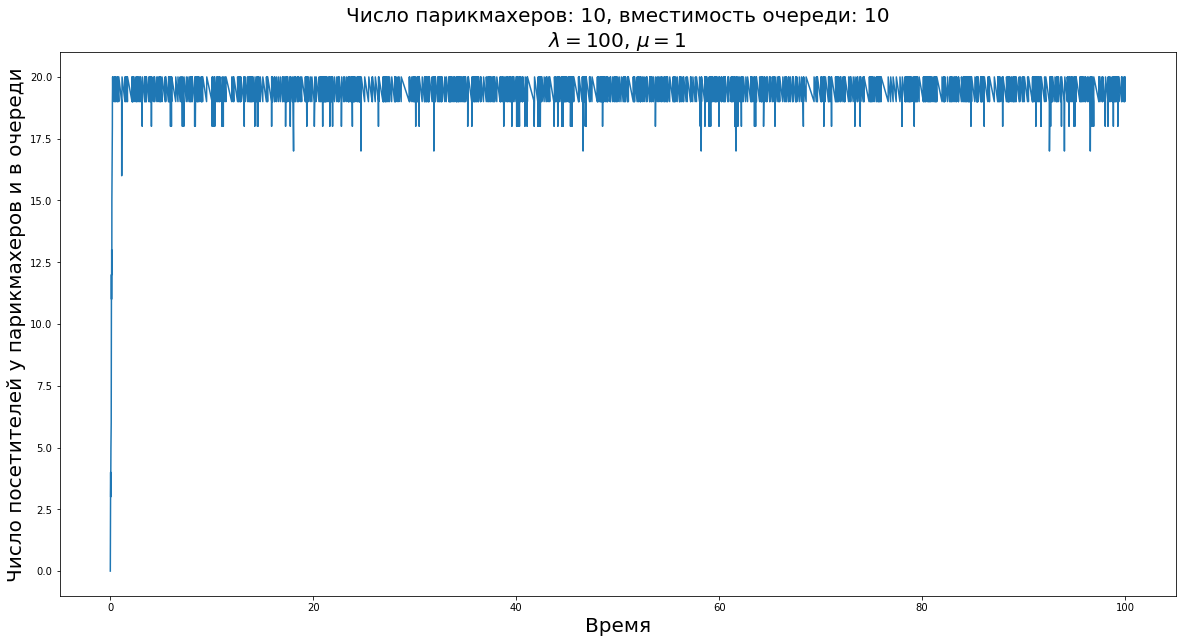

In [12]:
T = 100
lamb = 100
mu = 1
barbers_amt = 10
queue_size = 10

t, amt = gen_chain(T, lamb, mu, barbers_amt, queue_size)
plt.figure(figsize=(20, 10))
plt.plot(t, amt)
plt.title(f'Число парикмахеров: {barbers_amt}, вместимость очереди: {queue_size}\n$\lambda = ${lamb}, $\mu = ${mu}', size = 20)
plt.xlabel("Время", size = 20)
plt.ylabel("Число посетителей у парикмахеров и в очереди", size = 20)
None

In [18]:
T = 0.01
lamb = 1
mu = 2
barbers_amt = 2
queue_size = 2
repets = 1000
Q_ = []

for i in range(barbers_amt + queue_size + 1):
    distr = [gen_chain(T, lamb, mu, barbers_amt, queue_size, i)[1][-1] for j in range(repets)]
    q = np.bincount(distr, minlength = barbers_amt + queue_size + 1) / repets
    q[i] -= 1
    q = q / T
    Q_.append(q)
pd.DataFrame(Q_)

,0,1,2,3,4
0,-1.4,1.4,0.0,0.0,0.0
1,1.7,-3.1,1.4,0.0,0.0
2,0.2,4.1,-5.6,1.3,0.0
3,0.0,0.1,4.7,-5.5,0.7
4,0.0,0.0,0.2,3.0,-3.2


In [19]:
T = 0.001
lamb = 1
mu = 2
barbers_amt = 2
queue_size = 2
repets = 1000

pd.DataFrame(Q(lamb, mu, barbers_amt, queue_size))

,0,1,2,3,4
0,-1,1,0,0,0
1,2,-3,1,0,0
2,0,4,-5,1,0
3,0,0,4,-5,1
4,0,0,0,4,-4
